### Import Required Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
plt.style.use('seaborn-v0_8-whitegrid')

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


### Load and Prepare Data

In [9]:
# Load dataset
df = pd.read_csv('Depression Professional Dataset.csv')
print(f"Dataset loaded: {df.shape}")

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

Dataset loaded: (2054, 11)

Categorical columns: ['Gender', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']
Numerical columns: ['Age', 'Work Pressure', 'Job Satisfaction', 'Work Hours', 'Financial Stress']


### Data Preparation for Regression (Predicting Age)

In [10]:
# Create a copy for regression
df_reg = df.copy()

# Encode categorical variables
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_reg[col] = le.fit_transform(df_reg[col])
    le_dict[col] = le

# Prepare features and target (predicting Age)
X_reg = df_reg.drop('Age', axis=1)
y_reg = df_reg['Age']

# Split data (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Feature count: {X_reg.shape[1]}")
print(f"\nTarget variable (Age) - Mean: {y_reg.mean():.2f}, Std: {y_reg.std():.2f}")
print(f"Age range: {y_reg.min():.0f} to {y_reg.max():.0f}")

Training set size: 1643
Test set size: 411
Feature count: 10

Target variable (Age) - Mean: 42.17, Std: 11.46
Age range: 18 to 60


## Algorithm 1: Linear Regression

In [11]:
print("="*80)
print("ALGORITHM 1: LINEAR REGRESSION")
print("="*80)

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate metrics
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"\nPerformance Metrics:")
print(f"  Mean Absolute Error (MAE):      {lr_mae:.4f}")
print(f"  Mean Squared Error (MSE):       {lr_mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {lr_rmse:.4f}")
print(f"  R² Score:                       {lr_r2:.4f}")

print(f"\nModel Coefficients:")
print(f"  Intercept: {lr_model.intercept_:.4f}")
print(f"  Number of features: {len(lr_model.coef_)}")
print(f"  Max coefficient magnitude: {np.max(np.abs(lr_model.coef_)):.4f}")

ALGORITHM 1: LINEAR REGRESSION

Performance Metrics:
  Mean Absolute Error (MAE):      8.3183
  Mean Squared Error (MSE):       101.1740
  Root Mean Squared Error (RMSE): 10.0585
  R² Score:                       0.2529

Model Coefficients:
  Intercept: 42.2928
  Number of features: 10
  Max coefficient magnitude: 5.9042


## Algorithm 2: Polynomial Regression (degree=2)

In [12]:
print("="*80)
print("ALGORITHM 2: POLYNOMIAL REGRESSION (degree=2)")
print("="*80)

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

print(f"\nPolynomial transformation:")
print(f"  Original features: {X_train_scaled.shape[1]}")
print(f"  Polynomial features: {X_train_poly.shape[1]}")

# Train Polynomial Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Calculate metrics
poly_mae = mean_absolute_error(y_test, y_pred_poly)
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_rmse = np.sqrt(poly_mse)
poly_r2 = r2_score(y_test, y_pred_poly)

print(f"\nPerformance Metrics:")
print(f"  Mean Absolute Error (MAE):      {poly_mae:.4f}")
print(f"  Mean Squared Error (MSE):       {poly_mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {poly_rmse:.4f}")
print(f"  R² Score:                       {poly_r2:.4f}")

ALGORITHM 2: POLYNOMIAL REGRESSION (degree=2)

Polynomial transformation:
  Original features: 10
  Polynomial features: 66

Performance Metrics:
  Mean Absolute Error (MAE):      8.3011
  Mean Squared Error (MSE):       103.8671
  Root Mean Squared Error (RMSE): 10.1915
  R² Score:                       0.2330


## Regression Results Comparison

In [13]:
print("="*80)
print("REGRESSION RESULTS COMPARISON")
print("="*80)

# Create comparison table
comparison = pd.DataFrame({
    'Algorithm': ['Linear Regression', 'Polynomial Regression (deg=2)'],
    'MAE': [lr_mae, poly_mae],
    'MSE': [lr_mse, poly_mse],
    'RMSE': [lr_rmse, poly_rmse],
    'R² Score': [lr_r2, poly_r2]
})

print("\n", comparison.to_string(index=False))
comparison.to_csv('output_files/Task3_Regression_Results.csv', index=False)
print("\n✓ Saved to: output_files/Task3_Regression_Results.csv")

# Find best algorithm by R² score
best_idx = comparison['R² Score'].idxmax()
best_algo = comparison.loc[best_idx, 'Algorithm']
best_r2 = comparison.loc[best_idx, 'R² Score']
print(f"\nBest Algorithm: {best_algo} (R² Score: {best_r2:.4f})")

REGRESSION RESULTS COMPARISON

                     Algorithm      MAE        MSE      RMSE  R² Score
            Linear Regression 8.318267 101.174004 10.058529  0.252921
Polynomial Regression (deg=2) 8.301133 103.867078 10.191520  0.233035

✓ Saved to: output_files/Task3_Regression_Results.csv

Best Algorithm: Linear Regression (R² Score: 0.2529)


## Visualize Regression Results

✓ Saved: output_files/Task3_Regression_Predictions.png


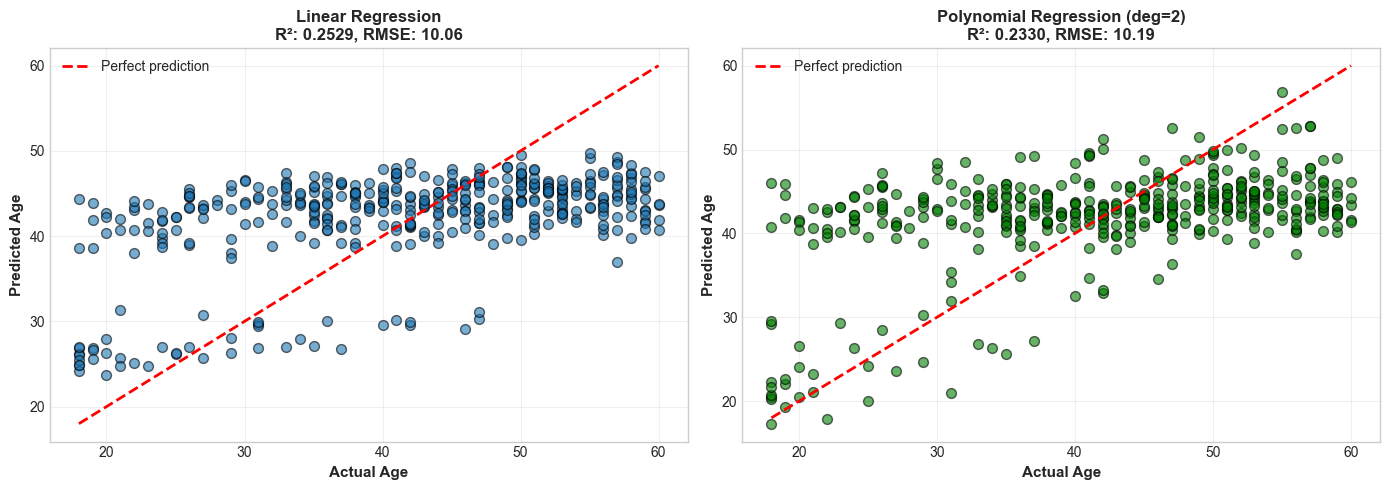


TASK 3: REGRESSION COMPLETED


In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear Regression plot
axes[0].scatter(y_test, y_pred_lr, alpha=0.6, edgecolors='k', s=50)
axes[0].plot([y_test.min(), y_test.max()], 
            [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect prediction')
axes[0].set_xlabel('Actual Age', fontweight='bold', fontsize=11)
axes[0].set_ylabel('Predicted Age', fontweight='bold', fontsize=11)
axes[0].set_title(f'Linear Regression\nR²: {lr_r2:.4f}, RMSE: {lr_rmse:.2f}', 
                 fontweight='bold', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Polynomial Regression plot
axes[1].scatter(y_test, y_pred_poly, alpha=0.6, edgecolors='k', s=50, color='green')
axes[1].plot([y_test.min(), y_test.max()], 
            [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect prediction')
axes[1].set_xlabel('Actual Age', fontweight='bold', fontsize=11)
axes[1].set_ylabel('Predicted Age', fontweight='bold', fontsize=11)
axes[1].set_title(f'Polynomial Regression (deg=2)\nR²: {poly_r2:.4f}, RMSE: {poly_rmse:.2f}', 
                 fontweight='bold', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('output_files/Task3_Regression_Predictions.png', dpi=300, bbox_inches='tight')
print("✓ Saved: output_files/Task3_Regression_Predictions.png")
plt.show()

print("\n" + "="*80)
print("TASK 3: REGRESSION COMPLETED")
print("="*80)